In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
import os
# import cv2
import keras
import keras.utils as utils
from keras.models import Sequential
from keras import layers
from keras import models
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras import regularizers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.models import Model
import tensorflow as tf
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import seaborn as sns

In [11]:
IMG_HEIGHT = 256
IMG_WIDTH = 256
batch_size = 32
epochs = 15
np.random.seed(42)
tf.random.set_seed(42)

In [12]:
train_dir = r"C:\Users\Issac\Downloads\HacX\train"
test_dir = r"C:\Users\Issac\Downloads\HacX\test"

In [13]:
train_image_generator = ImageDataGenerator(
                    rescale=1./255, rotation_range=20,
                    width_shift_range=.15, height_shift_range=.15,
                    horizontal_flip=True,  zoom_range=0.15)

validation_image_generator = ImageDataGenerator(rescale=1./255)

train_data_gen = train_image_generator.flow_from_directory(batch_size=batch_size,
                                                           directory=train_dir,
                                                           shuffle=True,
                                                           target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                           class_mode='categorical')

test_data_gen = validation_image_generator.flow_from_directory(batch_size=batch_size,
                                                              directory=test_dir,
                                                              shuffle = False,
                                                              target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                              class_mode='categorical')

Found 3734 images belonging to 3 classes.
Found 1244 images belonging to 3 classes.


In [11]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3,3), padding='same',activation='relu', kernel_regularizer=regularizers.l2(0.001), input_shape=(256, 256, 3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(32, (3,3), padding='same', activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(32, (3,3), padding='same', activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(32, (3,3), padding='same', activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.8))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(3, activation='softmax'))
print(model.summary())

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 256, 256, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 128, 128, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 128, 128, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 64, 64, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 64, 64, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 32, 32, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 32, 32, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 8192)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 8192)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 16)             │       131,088 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 3)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 159,779 (624.14 KB)

 Trainable params: 159,779 (624.14 KB)

 Non-trainable params: 0 (0.00 B)

None


In [12]:
path_checkpoint= r"C:\Users\Marcus\Documents\NYP\NYPY3\Y3S2\Hackathon\Project Data\model_checkpoint.weights.h5"
es_callback = keras.callbacks.EarlyStopping(monitor="accuracy",patience=5)
modelckpt_callback=keras.callbacks.ModelCheckpoint(
    monitor="accuracy",
    filepath=path_checkpoint,
    verbose=1,
    save_weights_only=True,
    save_best_only=True)


optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
ref_history = model.fit(train_data_gen,epochs=epochs,validation_data=test_data_gen, callbacks=[es_callback, modelckpt_callback])

Epoch 1/25
117/117 ━━━━━━━━━━━━━━━━━━━━ 0s 380ms/step - accuracy: 0.6609 - loss: 0.8052
Epoch 1: accuracy improved from -inf to 0.68265, saving model to C:\Users\Marcus\Documents\NYP\NYPY3\Y3S2\Hackathon\Project Data\model_checkpoint.weights.h5
117/117 ━━━━━━━━━━━━━━━━━━━━ 48s 405ms/step - accuracy: 0.6611 - loss: 0.8045 - val_accuracy: 0.6977 - val_loss: 0.7161
Epoch 2/25
117/117 ━━━━━━━━━━━━━━━━━━━━ 0s 734ms/step - accuracy: 0.7241 - loss: 0.6411
Epoch 2: accuracy improved from 0.68265 to 0.73299, saving model to C:\Users\Marcus\Documents\NYP\NYPY3\Y3S2\Hackathon\Project Data\model_checkpoint.weights.h5
117/117 ━━━━━━━━━━━━━━━━━━━━ 92s 792ms/step - accuracy: 0.7242 - loss: 0.6409 - val_accuracy: 0.7275 - val_loss: 0.6160
Epoch 3/25
117/117 ━━━━━━━━━━━━━━━━━━━━ 0s 585ms/step - accuracy: 0.7455 - loss: 0.6073
Epoch 3: accuracy improved from 0.73299 to 0.74799, saving model to C:\Users\Marcus\Documents\NYP\NYPY3\Y3S2\Hackathon\Project Data\model_checkpoint.weights.h5
117/117 ━━━━━━━━━━━

39/39 ━━━━━━━━━━━━━━━━━━━━ 3s 70ms/step
Classification Report:
              precision    recall  f1-score   support

        haze       0.66      0.76      0.70       200
      normal       0.91      0.91      0.91       841
       smoke       0.82      0.69      0.75       203

    accuracy                           0.85      1244
   macro avg       0.80      0.79      0.79      1244
weighted avg       0.85      0.85      0.85      1244

Overall Accuracy: 84.89%


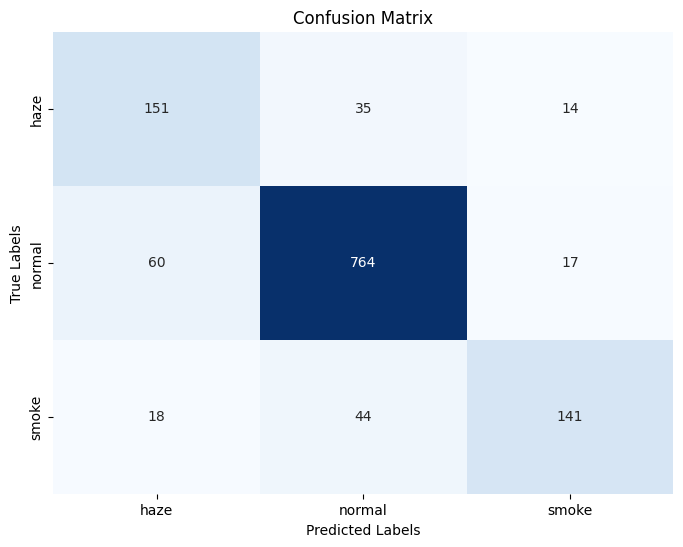

In [13]:
# Predict on the test dataset
y_pred_prob = model.predict(test_data_gen)  # Predictions as probabilities
y_pred = np.argmax(y_pred_prob, axis=1)         # Convert probabilities to class indices
y_true = test_data_gen.classes                  # True labels from the test generator

# Get class labels
class_indices = test_data_gen.class_indices
class_labels = list(class_indices.keys())

#Creating Confusion Matrix
cm = confusion_matrix(y_true, y_pred)

#Creating Classification Report
report = classification_report(y_true, y_pred, target_names=class_labels)
accuracy = accuracy_score(y_true, y_pred)

# Print Classification Report
print("Classification Report:")
print(report)
print(f"Overall Accuracy: {accuracy * 100:.2f}%")

# Plot Confusion Matrix
plt.figure(figsize=(8, 6))
cm_df = pd.DataFrame(cm, index=class_labels, columns=class_labels)
sns.heatmap(cm_df, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [14]:
model.save("my_model.h5")

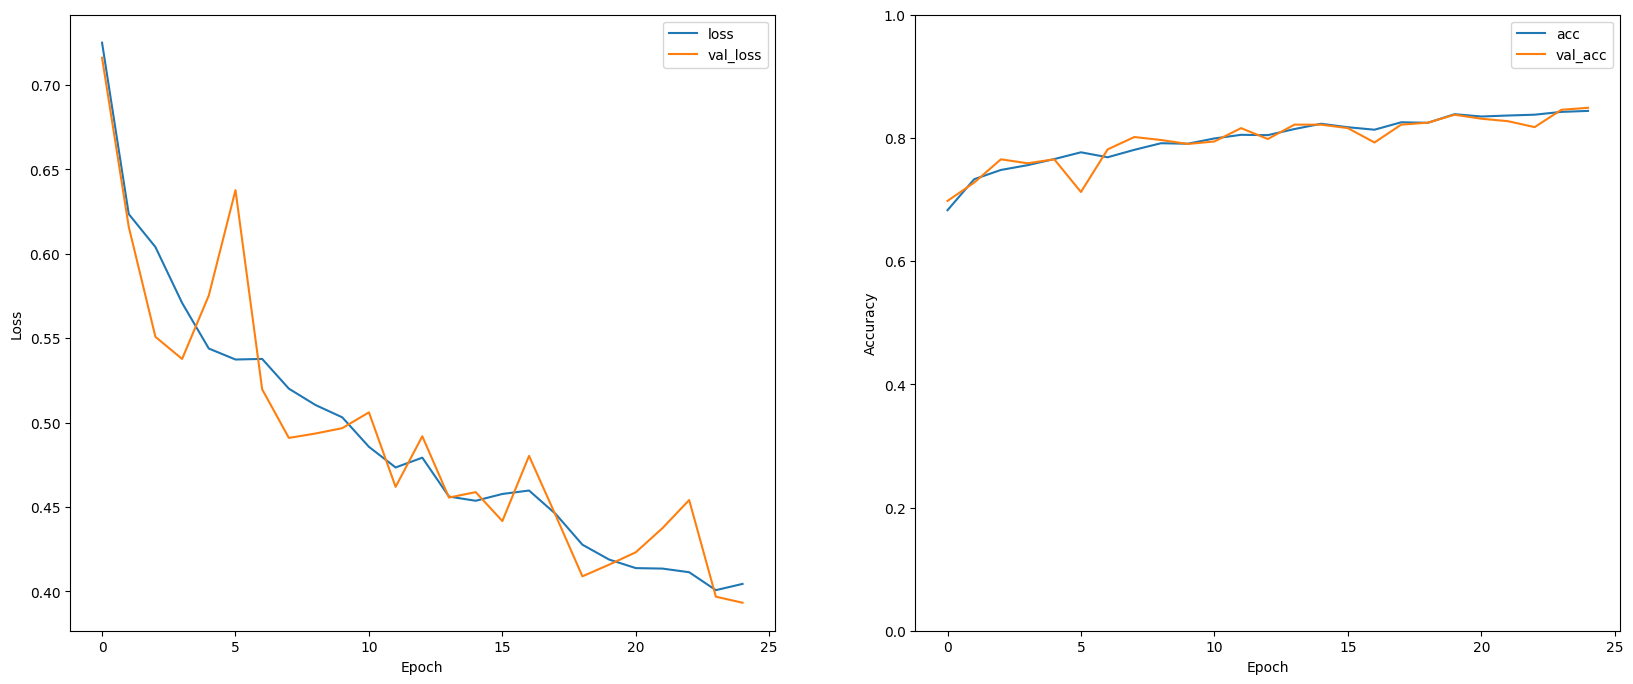

In [15]:
loss = ref_history.history['loss']
val_loss = ref_history.history['val_loss']
acc = ref_history.history['accuracy']
val_acc = ref_history.history['val_accuracy']

plt.figure(figsize=(20, 8))
plt.subplot(1, 2, 1)
plt.plot(loss,label='loss')
plt.plot(val_loss,label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(acc,label='acc')
plt.plot(val_acc,label='val_acc')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.ylim([0, 1])

plt.show()

In [16]:
import tensorflow as tf

# SavedModel or .keras/.h5
model = tf.keras.models.load_model("my_model.h5")

Loaded model from my_model.h5
Using last conv layer: conv2d_7
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 144ms/step
Predicted class index: 0 (0.8572)


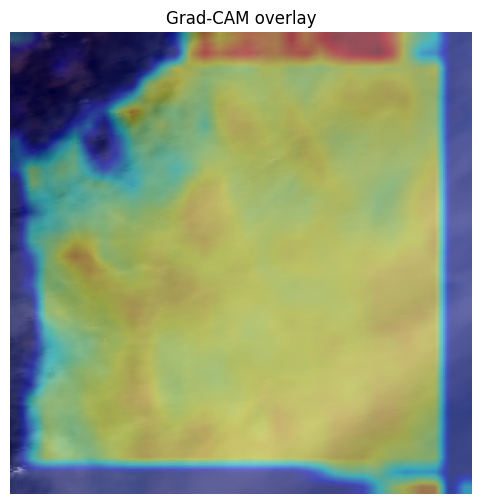

Saved Grad-CAM overlay to: C:\Users\Marcus\Documents\NYP\NYPY3\Y3S2\Hackathon\output\gradcam_haze_1.png


In [7]:
# Grad-CAM explanation cell (use a fresh Input tensor and apply model.layers to it to avoid `has never been called` errors)
import os
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import cv2
from pathlib import Path

# Overlay helper
def overlay_heatmap_on_image(orig_img_path, heatmap, out_path, alpha=0.4):
    img_bgr = cv2.imread(str(orig_img_path))
    if img_bgr is None:
        raise FileNotFoundError(f'Image not found: {orig_img_path}')
    img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
    heatmap_resized = cv2.resize(np.uint8(255 * heatmap), (img_rgb.shape[1], img_rgb.shape[0]))
    heatmap_colored = cv2.applyColorMap(heatmap_resized, cv2.COLORMAP_JET)
    heatmap_colored = cv2.cvtColor(heatmap_colored, cv2.COLOR_BGR2RGB)
    overlay = np.uint8(img_rgb * (1 - alpha) + heatmap_colored * alpha)
    Path(out_path).parent.mkdir(parents=True, exist_ok=True)
    plt.imsave(out_path, overlay)
    return overlay

# --- Configuration ---
img_path = r"./HacX/test/haze/haze_1.tif"
model_path = 'my_model.h5'

# Load model (force load to ensure layers have inbound nodes)
if not os.path.exists(model_path):
    raise FileNotFoundError(f'Model file not found: {model_path}')
model = tf.keras.models.load_model(model_path)
print(f'Loaded model from {model_path}')

# Find last Conv2D layer name
last_conv_layer_name = None
for layer in reversed(model.layers):
    if isinstance(layer, tf.keras.layers.Conv2D):
        last_conv_layer_name = layer.name
        break
if last_conv_layer_name is None:
    for layer in reversed(model.layers):
        if 'conv' in layer.name.lower():
            last_conv_layer_name = layer.name
            break
if last_conv_layer_name is None:
    raise RuntimeError('Could not find a Conv2D layer in the model. Inspect model.summary() to choose a layer name.')
print(f'Using last conv layer: {last_conv_layer_name}')

# Build a fresh functional graph by applying the model's layers to a new Input tensor.
# This avoids relying on model.input which may point to an unconnected graph in some sessions.
input_shape = (IMG_HEIGHT, IMG_WIDTH, 3)
new_input = tf.keras.Input(shape=input_shape)
x = new_input
conv_tensor = None
for layer in model.layers:
    # Skip InputLayer if present
    if isinstance(layer, tf.keras.layers.InputLayer):
        continue
    try:
        x = layer(x)
    except Exception as e:
        # Some layers (like nested Models) might not accept being called directly in this manner.
        # Fallback: call the whole model on new_input and then try to fetch the conv tensor by using get_layer().output
        print(f'Layer {layer.name} could not be called on the new input: {e}')
        x = model(new_input)  # build via the model call
        break
    if layer.name == last_conv_layer_name:
        conv_tensor = x

# If conv_tensor is still None, try to fetch it via get_layer(...).output after model(new_input)
if conv_tensor is None:
    try:
        # Ensure model(new_input) was executed so that sub-layers have inbound nodes
        preds = model(new_input)
        conv_layer = model.get_layer(last_conv_layer_name)
        conv_tensor = conv_layer.output
    except Exception as e:
        raise RuntimeError(f'Failed to resolve conv tensor for layer {last_conv_layer_name}: {e}')

# Build gradient model mapping new_input -> [conv_tensor, preds]
# If preds isn't defined (due to earlier traversal), create preds by continuing from x
try:
    preds  # if preds exists
except NameError:
    preds = x

grad_model = tf.keras.models.Model(inputs=new_input, outputs=[conv_tensor, preds])

# Preprocess image (rescale 1./255 used during training)
from keras.utils import load_img, img_to_array
pil_img = load_img(img_path, target_size=(IMG_HEIGHT, IMG_WIDTH))
arr = img_to_array(pil_img) / 255.0
input_tensor = np.expand_dims(arr, axis=0).astype(np.float32)

# Compute Grad-CAM heatmap
with tf.GradientTape() as tape:
    conv_outputs, predictions = grad_model(input_tensor)
    pred_index = tf.argmax(predictions[0])
    loss = predictions[:, pred_index]

grads = tape.gradient(loss, conv_outputs)
pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))

conv_outputs = conv_outputs[0]
heatmap = tf.zeros(conv_outputs.shape[0:2], dtype=tf.float32)
for i in range(conv_outputs.shape[-1]):
    heatmap += pooled_grads[i] * conv_outputs[:, :, i]

heatmap = tf.maximum(heatmap, 0) / (tf.math.reduce_max(heatmap) + 1e-8)
heatmap = heatmap.numpy()

# Overlay & save
out_dir = Path('output')
out_dir.mkdir(exist_ok=True)
out_file = out_dir / f'gradcam_{Path(img_path).stem}.png'
overlay = overlay_heatmap_on_image(img_path, heatmap, out_file)

# Prediction and reporting
probs = model.predict(input_tensor)[0]
pred_class = int(np.argmax(probs))
class_names = None
if 'test_data_gen' in globals():
    class_names = list(test_data_gen.class_indices.keys())

if class_names and len(class_names) > pred_class:
    print(f"Predicted: {class_names[pred_class]} ({probs[pred_class]:.4f})")
else:
    print(f"Predicted class index: {pred_class} ({probs[pred_class]:.4f})")

# Show overlay
plt.figure(figsize=(6,6))
plt.imshow(overlay)
plt.axis('off')
plt.title('Grad-CAM overlay')
plt.show()
print(f"Saved Grad-CAM overlay to: {out_file.resolve()}")


Using background shape for SHAP: (20, 256, 256, 3)


c:\Users\Marcus\anaconda3\envs\tflocal\lib\site-packages\keras\src\models\functional.py:241: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: input_layer_1
Received: inputs=['Tensor(shape=(1, 256, 256, 3))']
  warnings.warn(msg)
c:\Users\Marcus\anaconda3\envs\tflocal\lib\site-packages\keras\src\models\functional.py:241: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: input_layer_1
Received: inputs=['Tensor(shape=(50, 256, 256, 3))']
  warnings.warn(msg)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
Predicted class index (for SHAP focus): 0
Saved SHAP overlay to: C:\Users\Marcus\Documents\NYP\NYPY3\Y3S2\Hackathon\output\shap_haze_1.png
Saved fused SHAP×Grad-CAM overlay to: C:\Users\Marcus\Documents\NYP\NYPY3\Y3S2\Hackathon\output\fused_shap_gradcam_haze_1.png


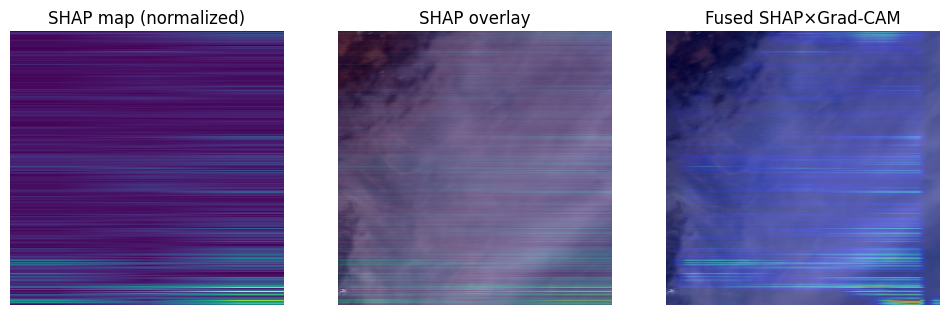

In [8]:
# SHAP explanation cell (paste into your empty cell 12)
# Requires: pip install shap
import os
import random
from pathlib import Path
import numpy as np
import cv2
import matplotlib.pyplot as plt
import tensorflow as tf
from keras.utils import load_img, img_to_array

# --- Config / reuse existing globals when available ---
IMG_H = globals().get("IMG_HEIGHT", 256)
IMG_W = globals().get("IMG_WIDTH", 256)
img_path = globals().get("img_path", "./HacX/test/haze/haze_1.tif")
model = globals().get("model", None)
model_path = "my_model.h5"

# load model if not already loaded
if model is None:
    if not os.path.exists(model_path):
        raise FileNotFoundError(f"Model not found at {model_path} and no `model` in globals()")
    model = tf.keras.models.load_model(model_path)
    print(f"Loaded model from {model_path}")

# --- Prepare the target image (same preprocessing as training: 1./255) ---
pil = load_img(img_path, target_size=(IMG_H, IMG_W))
x = img_to_array(pil) / 255.0
x_batch = np.expand_dims(x, axis=0).astype(np.float32)

# --- Build SHAP background without touching train_data_gen state ---
background = None
if "train_dir" in globals() and os.path.isdir(train_dir):
    # collect image files under train_dir (non-destructive)
    image_files = list(Path(train_dir).rglob("*.*"))
    # filter common image extensions
    image_files = [p for p in image_files if p.suffix.lower() in (".png", ".jpg", ".jpeg", ".tif", ".tiff", ".bmp")]
    if len(image_files) == 0:
        background = np.repeat(x_batch, 10, axis=0)
    else:
        n_bg = min(20, len(image_files))
        sampled = random.sample(image_files, n_bg)
        bg_list = []
        for p in sampled:
            try:
                pil_bg = load_img(str(p), target_size=(IMG_H, IMG_W))
                arr_bg = img_to_array(pil_bg) / 255.0
                bg_list.append(arr_bg)
            except Exception as e:
                # skip bad files
                continue
        if len(bg_list) == 0:
            background = np.repeat(x_batch, 10, axis=0)
        else:
            background = np.stack(bg_list, axis=0).astype(np.float32)
else:
    # fallback: repeat the target image
    background = np.repeat(x_batch, 10, axis=0)

print(f"Using background shape for SHAP: {background.shape}")

# --- Import SHAP (give helpful message if not installed) ---
try:
    import shap
except Exception as e:
    raise ImportError("SHAP is not installed in this environment. Install with: pip install shap") from e

# --- Create GradientExplainer (robust to API shapes) ---
# GradientExplainer can accept (model, model.input) or model directly
try:
    explainer = shap.GradientExplainer((model, model.input), background)
except Exception:
    explainer = shap.GradientExplainer(model, background)

# --- Compute SHAP values for the image batch ---
shap_values = explainer.shap_values(x_batch)  # may be list or array

# Select predicted class index
preds = model.predict(x_batch)
class_idx = int(np.argmax(preds[0]))
print(f"Predicted class index (for SHAP focus): {class_idx}")

# --- Normalize and extract SHAP map for the chosen class ---
# shap_values formats vary by version:
# - sometimes returns list (per-class) of arrays shaped (batch, H, W, C)
# - sometimes returns array shaped (classes, batch, H, W, C) or (batch, H, W, C)
if isinstance(shap_values, list):
    # list length == number of classes
    sv = shap_values[class_idx][0]  # shape (H, W, C)
else:
    sv = shap_values
    if sv.ndim == 5:
        # (classes, batch, H, W, C)
        sv = sv[class_idx][0]
    elif sv.ndim == 4:
        # (batch, H, W, C) -> take first
        sv = sv[0]
    else:
        raise RuntimeError(f"Unexpected shap_values shape: {np.shape(shap_values)}")

# Aggregate across channels: absolute-sum (common choice)
shap_map = np.sum(np.abs(sv), axis=-1)  # shape (H, W)
# resize to expected IMG_H, IMG_W if needed
if shap_map.shape != (IMG_H, IMG_W):
    shap_map = cv2.resize(shap_map, (IMG_W, IMG_H))

# normalize to [0,1]
shap_map = (shap_map - shap_map.min()) / ( (shap_map.max() - shap_map.min()) + 1e-8 )

# --- Save SHAP overlay (colorized) ---
out_dir = Path("output")
out_dir.mkdir(parents=True, exist_ok=True)
stem = Path(img_path).stem
shap_uint8 = (shap_map * 255).astype("uint8")
heatmap_colored = cv2.applyColorMap(shap_uint8, cv2.COLORMAP_VIRIDIS)  # nicer colormap for SHAP
heatmap_colored = cv2.cvtColor(heatmap_colored, cv2.COLOR_BGR2RGB)

orig_bgr = cv2.imread(str(img_path))
if orig_bgr is None:
    # try loading via PIL fallback path (if path is relative to notebook)
    raise FileNotFoundError(f"Could not read original image at {img_path}")
orig_rgb = cv2.cvtColor(orig_bgr, cv2.COLOR_BGR2RGB)
heatmap_resized = cv2.resize(heatmap_colored, (orig_rgb.shape[1], orig_rgb.shape[0]))
shap_overlay = np.uint8(orig_rgb * 0.6 + heatmap_resized * 0.4)

shap_out = out_dir / f"shap_{stem}.png"
plt.imsave(shap_out, shap_overlay)
print(f"Saved SHAP overlay to: {shap_out.resolve()}")

# --- Optionally fuse with Grad-CAM if a grad-cam heatmap (variable `heatmap`) is present ---
fused_saved = False
if "heatmap" in globals():
    try:
        # assume heatmap is the raw gradcam 2D map (values in [0..1]) and resize to input
        gradcam_map = globals()["heatmap"]
        if isinstance(gradcam_map, np.ndarray):
            # ensure shape and resize if needed
            if gradcam_map.shape != (IMG_H, IMG_W):
                gradcam_up = cv2.resize(np.uint8(255 * gradcam_map), (IMG_W, IMG_H)).astype("float32") / 255.0
            else:
                gradcam_up = gradcam_map.astype("float32")
            # fuse
            fused = gradcam_up * shap_map
            fused = (fused - fused.min()) / ( (fused.max() - fused.min()) + 1e-8 )
            fused_uint8 = (fused * 255).astype("uint8")
            fused_colored = cv2.applyColorMap(fused_uint8, cv2.COLORMAP_JET)
            fused_colored = cv2.cvtColor(fused_colored, cv2.COLOR_BGR2RGB)
            fused_resized = cv2.resize(fused_colored, (orig_rgb.shape[1], orig_rgb.shape[0]))
            fused_overlay = np.uint8(orig_rgb * 0.6 + fused_resized * 0.4)
            fused_out = out_dir / f"fused_shap_gradcam_{stem}.png"
            plt.imsave(fused_out, fused_overlay)
            print(f"Saved fused SHAP×Grad-CAM overlay to: {fused_out.resolve()}")
            fused_saved = True
    except Exception as e:
        print("Could not fuse with `heatmap` variable (Grad-CAM). Error:", e)

# If gradcam file exists in output but heatmap var not present, try to inform
if not fused_saved:
    possible_gc = out_dir / f"gradcam_{stem}.png"
    if possible_gc.exists():
        print(f"No `heatmap` variable available to fuse, but found saved Grad-CAM at {possible_gc}. You can re-run Grad-CAM cell to expose `heatmap` and then re-run this SHAP cell to produce a fused image.")
    else:
        print("No Grad-CAM available to fuse (no `heatmap` variable and no saved gradcam file). SHAP overlay saved.")

# --- Display small figure: SHAP map + overlay (and fused if available) ---
plt.figure(figsize=(12,4))
plt.subplot(1,3,1)
plt.title("SHAP map (normalized)")
plt.imshow(shap_map, cmap="viridis")
plt.axis("off")

plt.subplot(1,3,2)
plt.title("SHAP overlay")
plt.imshow(shap_overlay)
plt.axis("off")

plt.subplot(1,3,3)
if fused_saved:
    plt.title("Fused SHAP×Grad-CAM")
    plt.imshow(fused_overlay)
else:
    plt.title("Fused not available")
    plt.text(0.1, 0.5, "Run Grad-CAM first (to expose `heatmap`) to get fused", fontsize=10)
plt.axis("off")
plt.show()

## Transfer Learning Test

In [6]:
train_image_generator = ImageDataGenerator(
                    rescale=1./255, rotation_range=40,
                    width_shift_range=.3, height_shift_range=.3,
                    horizontal_flip=True,  zoom_range=0.3)

validation_image_generator = ImageDataGenerator(rescale=1./255)

train_data_gen = train_image_generator.flow_from_directory(batch_size=batch_size,
                                                           directory=train_dir,
                                                           shuffle=True,
                                                           target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                           class_mode='categorical')

test_data_gen = validation_image_generator.flow_from_directory(batch_size=batch_size,
                                                              directory=test_dir,
                                                              shuffle = False,
                                                              target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                              class_mode='categorical')

Found 3734 images belonging to 3 classes.
Found 1244 images belonging to 3 classes.


In [7]:
from keras.applications.mobilenet_v2 import MobileNetV2
from keras.layers import GlobalAveragePooling2D

#modify input_shape and classifier layers
base_model=MobileNetV2(weights='imagenet',include_top=False, input_shape=(IMG_HEIGHT, IMG_WIDTH, 3))

x = base_model.output
# x = Flatten()(x)
x=GlobalAveragePooling2D()(x)
x=Dense(512,activation='relu')(x)
x = Dropout(0.5)(x)  
preds=Dense(3, activation='softmax')(x)

Trans_Model=Model(inputs=base_model.input, outputs=preds)

C:\Users\Marcus\AppData\Local\Temp\ipykernel_6644\2566570856.py:5: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  base_model=MobileNetV2(weights='imagenet',include_top=False, input_shape=(IMG_HEIGHT, IMG_WIDTH, 3))


In [8]:
base_model.summary()

Model: "mobilenetv2_1.00_224"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 256, 256,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1 (Conv2D)      │ (None, 128, 128,  │        864 │ input_layer[0][0] │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bn_Conv1            │ (None, 128, 128,  │        128 │ Conv1[0][0]       │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1_relu (ReLU)   │ (None, 128, 128,  │          0 │ bn_Conv1[0][0]    │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 128, 128,  │        288 │ Conv1_relu[0][0]  │
│ (DepthwiseConv2D)   │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 128, 128,  │        128 │ expanded_conv_de… │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 128, 128,  │          0 │ expanded_conv_de… │
│ (ReLU)              │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 128, 128,  │        512 │ expanded_conv_de… │
│ (Conv2D)            │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 128, 128,  │         64 │ expanded_conv_pr… │
│ (BatchNormalizatio… │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand      │ (None, 128, 128,  │      1,536 │ expanded_conv_pr… │
│ (Conv2D)            │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_BN   │ (None, 128, 128,  │        384 │ block_1_expand[0… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_relu │ (None, 128, 128,  │          0 │ block_1_expand_B… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_pad         │ (None, 129, 129,  │          0 │ block_1_expand_r… │
│ (ZeroPadding2D)     │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise   │ (None, 64, 64,    │        864 │ block_1_pad[0][0] │
│ (DepthwiseConv2D)   │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 64, 64,    │        384 │ block_1_depthwis… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 64, 64,    │          0 │ block_1_depthwis… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_project     │ (None, 64, 64,    │      2,304 │ block_1_depthwis

 Total params: 2,257,984 (8.61 MB)

 Trainable params: 2,223,872 (8.48 MB)

 Non-trainable params: 34,112 (133.25 KB)

In [9]:
#freeze base model layers
base_model.trainable = False

# Let's confirm all the layers of convolutional base are frozen.
for layer in base_model.layers:
    print(layer.name, layer.trainable)

input_layer False
Conv1 False
bn_Conv1 False
Conv1_relu False
expanded_conv_depthwise False
expanded_conv_depthwise_BN False
expanded_conv_depthwise_relu False
expanded_conv_project False
expanded_conv_project_BN False
block_1_expand False
block_1_expand_BN False
block_1_expand_relu False
block_1_pad False
block_1_depthwise False
block_1_depthwise_BN False
block_1_depthwise_relu False
block_1_project False
block_1_project_BN False
block_2_expand False
block_2_expand_BN False
block_2_expand_relu False
block_2_depthwise False
block_2_depthwise_BN False
block_2_depthwise_relu False
block_2_project False
block_2_project_BN False
block_2_add False
block_3_expand False
block_3_expand_BN False
block_3_expand_relu False
block_3_pad False
block_3_depthwise False
block_3_depthwise_BN False
block_3_depthwise_relu False
block_3_project False
block_3_project_BN False
block_4_expand False
block_4_expand_BN False
block_4_expand_relu False
block_4_depthwise False
block_4_depthwise_BN False
block_4_dep

In [10]:
path_checkpoint= r"C:\Users\Marcus\Documents\NYP\NYPY3\Y3S2\Hackathon\Project Data\model_checkpoint.weights.h5"
es_callback = keras.callbacks.EarlyStopping(monitor="accuracy",patience=4)
modelckpt_callback=keras.callbacks.ModelCheckpoint(
    monitor="accuracy",
    filepath=path_checkpoint,
    verbose=1,
    save_weights_only=True,
    save_best_only=True)
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
Trans_Model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
history = Trans_Model.fit(train_data_gen,epochs=epochs,validation_data=test_data_gen, callbacks=[es_callback, modelckpt_callback])

c:\Users\Marcus\anaconda3\envs\tflocal\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/15
117/117 ━━━━━━━━━━━━━━━━━━━━ 0s 454ms/step - accuracy: 0.6462 - loss: 0.9693
Epoch 1: accuracy improved from -inf to 0.68425, saving model to C:\Users\Marcus\Documents\NYP\NYPY3\Y3S2\Hackathon\Project Data\model_checkpoint.weights.h5
117/117 ━━━━━━━━━━━━━━━━━━━━ 69s 566ms/step - accuracy: 0.6465 - loss: 0.9679 - val_accuracy: 0.7347 - val_loss: 0.6121
Epoch 2/15
117/117 ━━━━━━━━━━━━━━━━━━━━ 0s 444ms/step - accuracy: 0.7522 - loss: 0.6009
Epoch 2: accuracy improved from 0.68425 to 0.74558, saving model to C:\Users\Marcus\Documents\NYP\NYPY3\Y3S2\Hackathon\Project Data\model_checkpoint.weights.h5
117/117 ━━━━━━━━━━━━━━━━━━━━ 64s 544ms/step - accuracy: 0.7522 - loss: 0.6010 - val_accuracy: 0.7484 - val_loss: 0.6134
Epoch 3/15
117/117 ━━━━━━━━━━━━━━━━━━━━ 0s 436ms/step - accuracy: 0.7468 - loss: 0.6196
Epoch 3: accuracy improved from 0.74558 to 0.75736, saving model to C:\Users\Marcus\Documents\NYP\NYPY3\Y3S2\Hackathon\Project Data\model_checkpoint.weights.h5
117/117 ━━━━━━━━━━━

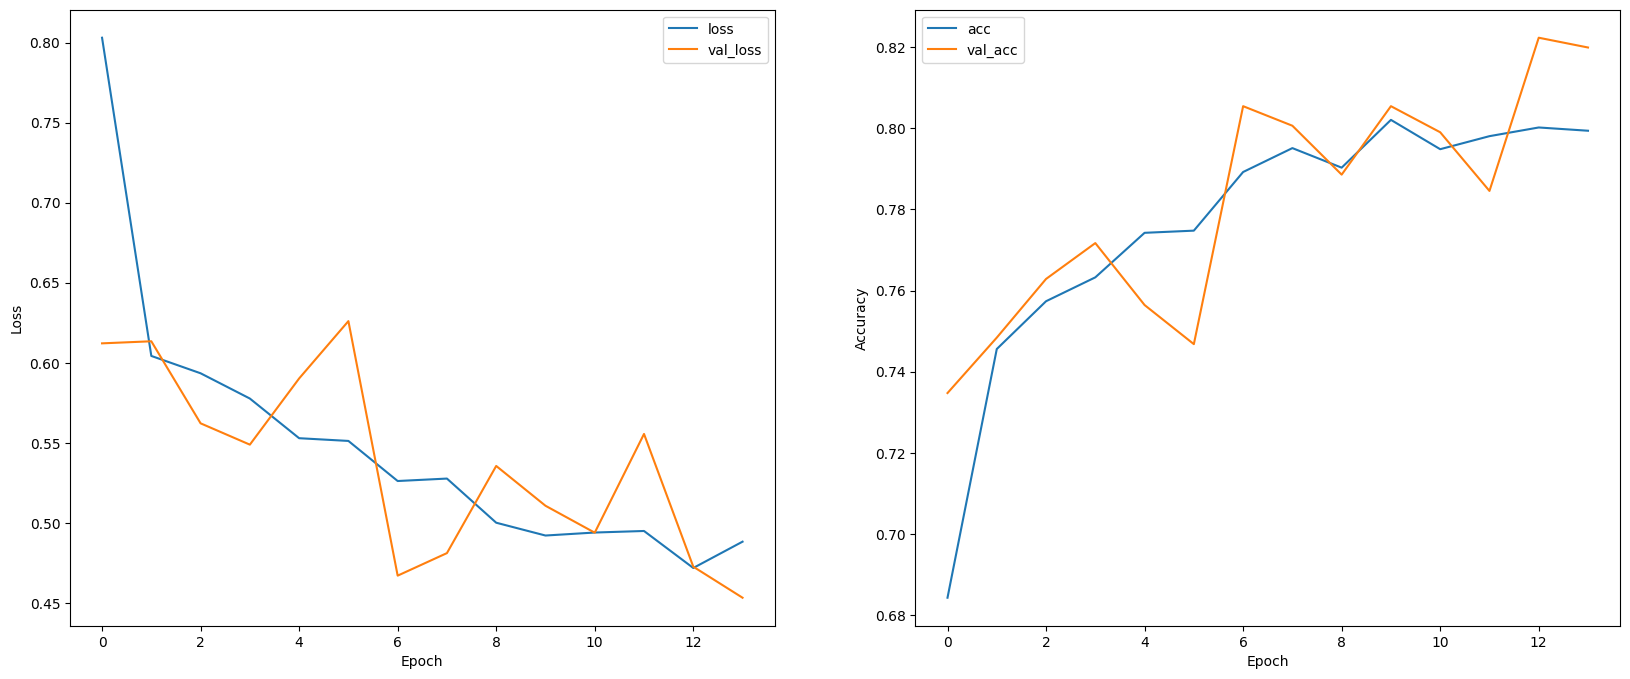

In [11]:
loss = history.history['loss']
val_loss = history.history['val_loss']
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.figure(figsize=(20, 8))
plt.subplot(1, 2, 1)
plt.plot(loss,label='loss')
plt.plot(val_loss,label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(acc,label='acc')
plt.plot(val_acc,label='val_acc')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

39/39 ━━━━━━━━━━━━━━━━━━━━ 12s 306ms/step
Classification Report:
              precision    recall  f1-score   support

        haze       0.69      0.56      0.62       200
      normal       0.85      0.95      0.89       841
       smoke       0.79      0.54      0.64       203

    accuracy                           0.82      1244
   macro avg       0.78      0.68      0.72      1244
weighted avg       0.81      0.82      0.81      1244

Overall Accuracy: 81.99%


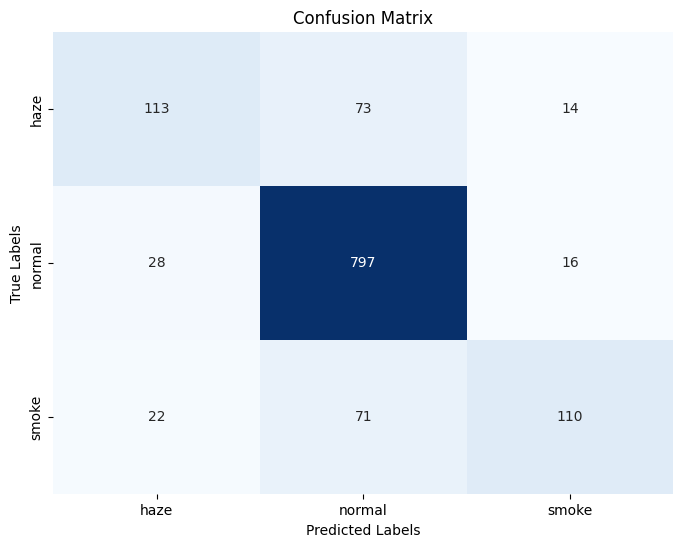

In [12]:
# Predict on the test dataset
y_pred_prob = Trans_Model.predict(test_data_gen)  # Predictions as probabilities
y_pred = np.argmax(y_pred_prob, axis=1)         # Convert probabilities to class indices
y_true = test_data_gen.classes                  # True labels from the test generator

# Get class labels
class_indices = test_data_gen.class_indices
class_labels = list(class_indices.keys())

# Confusion Matrix
cm = confusion_matrix(y_true, y_pred)

# Classification Report
report = classification_report(y_true, y_pred, target_names=class_labels)
accuracy = accuracy_score(y_true, y_pred)

# Print Classification Report
print("Classification Report:")
print(report)
print(f"Overall Accuracy: {accuracy * 100:.2f}%")

# Plot Confusion Matrix
plt.figure(figsize=(8, 6))
cm_df = pd.DataFrame(cm, index=class_labels, columns=class_labels)  # Create a DataFrame for better readability
sns.heatmap(cm_df, annot=True, fmt='d', cmap='Blues', cbar=False)   # Plot the heatmap
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [13]:
#Define freeze and unfrozen layers
for layer in Trans_Model.layers[:20]:
  layer.trainable=False

for layer in Trans_Model.layers[20:]:
  layer.trainable=True

In [14]:
path_checkpoint= r"C:\Users\Marcus\Documents\NYP\NYPY2\NYP Y2S2\EGT214 Deep Learning\Project Data\model_checkpoint.weights.h5"
es_callback = keras.callbacks.EarlyStopping(monitor="accuracy",patience=4)
modelckpt_callback=keras.callbacks.ModelCheckpoint(
    monitor="accuracy",
    filepath=path_checkpoint,
    verbose=1,
    save_weights_only=True,
    save_best_only=True)
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-5)
Trans_Model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
history = Trans_Model.fit(train_data_gen,epochs=epochs,validation_data=test_data_gen, callbacks=[es_callback, modelckpt_callback])

Epoch 1/15
117/117 ━━━━━━━━━━━━━━━━━━━━ 0s 999ms/step - accuracy: 0.6845 - loss: 1.8031
Epoch 1: accuracy improved from -inf to 0.71612, saving model to C:\Users\Marcus\Documents\NYP\NYPY2\NYP Y2S2\EGT214 Deep Learning\Project Data\model_checkpoint.weights.h5
117/117 ━━━━━━━━━━━━━━━━━━━━ 139s 1s/step - accuracy: 0.6848 - loss: 1.7985 - val_accuracy: 0.7862 - val_loss: 0.5882
Epoch 2/15
117/117 ━━━━━━━━━━━━━━━━━━━━ 0s 1000ms/step - accuracy: 0.7699 - loss: 0.5904
Epoch 2: accuracy improved from 0.71612 to 0.77183, saving model to C:\Users\Marcus\Documents\NYP\NYPY2\NYP Y2S2\EGT214 Deep Learning\Project Data\model_checkpoint.weights.h5
117/117 ━━━━━━━━━━━━━━━━━━━━ 129s 1s/step - accuracy: 0.7699 - loss: 0.5904 - val_accuracy: 0.8103 - val_loss: 0.5234
Epoch 3/15
117/117 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.7896 - loss: 0.5361
Epoch 3: accuracy improved from 0.77183 to 0.78495, saving model to C:\Users\Marcus\Documents\NYP\NYPY2\NYP Y2S2\EGT214 Deep Learning\Project Data\model_ch

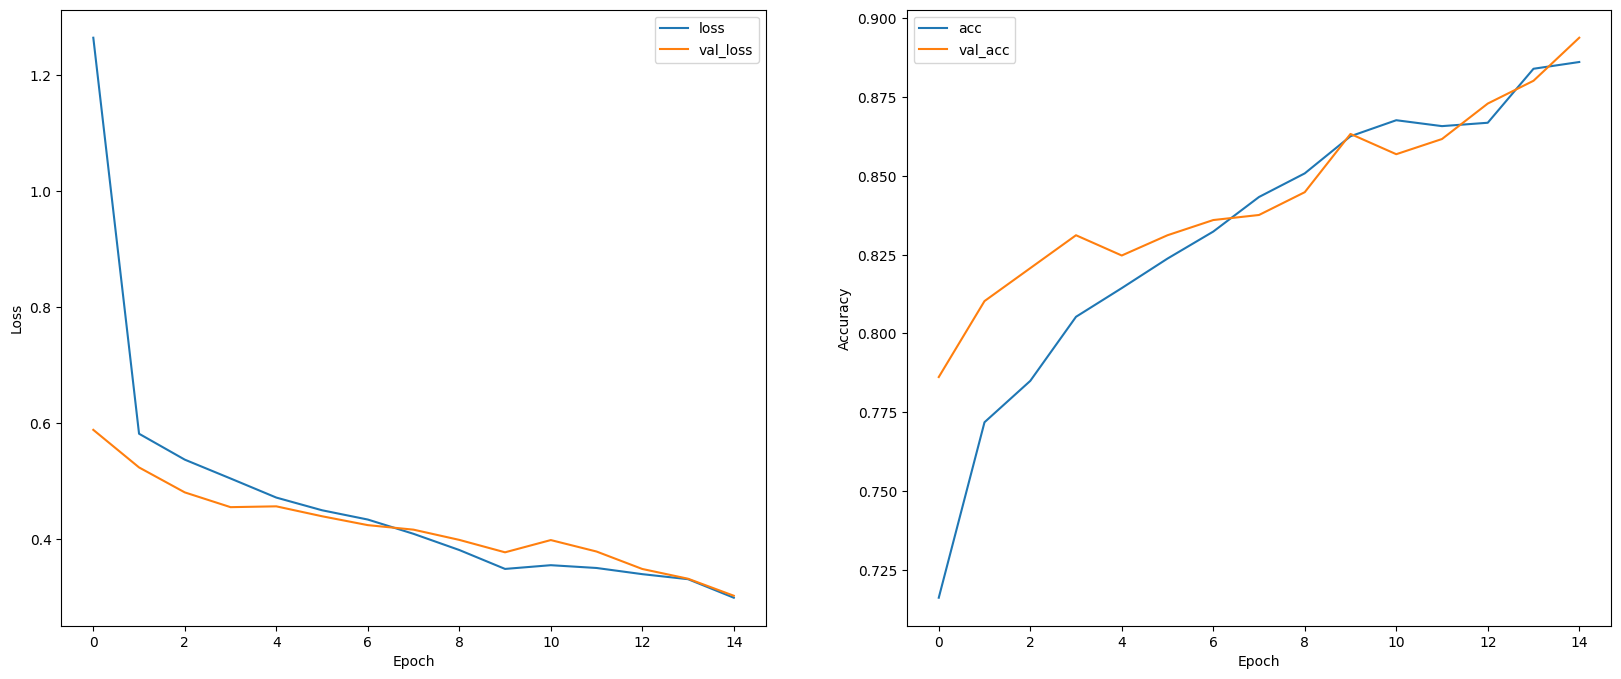

In [15]:
loss = history.history['loss']
val_loss = history.history['val_loss']
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.figure(figsize=(20, 8))
plt.subplot(1, 2, 1)
plt.plot(loss,label='loss')
plt.plot(val_loss,label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(acc,label='acc')
plt.plot(val_acc,label='val_acc')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

39/39 ━━━━━━━━━━━━━━━━━━━━ 27s 655ms/step
Classification Report:
              precision    recall  f1-score   support

        haze       0.86      0.72      0.79       200
      normal       0.92      0.95      0.94       841
       smoke       0.80      0.81      0.81       203

    accuracy                           0.89      1244
   macro avg       0.86      0.83      0.84      1244
weighted avg       0.89      0.89      0.89      1244

Overall Accuracy: 89.39%


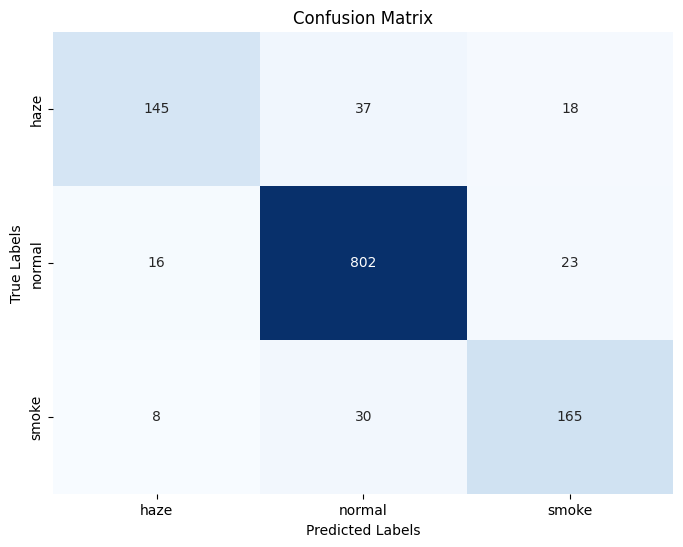

In [16]:
# Predict on the test dataset
y_pred_prob = Trans_Model.predict(test_data_gen)  # Predictions as probabilities
y_pred = np.argmax(y_pred_prob, axis=1)         # Convert probabilities to class indices
y_true = test_data_gen.classes                  # True labels from the test generator

# Get class labels
class_indices = test_data_gen.class_indices
class_labels = list(class_indices.keys())

# Confusion Matrix
cm = confusion_matrix(y_true, y_pred)

# Classification Report
report = classification_report(y_true, y_pred, target_names=class_labels)
accuracy = accuracy_score(y_true, y_pred)

# Print Classification Report
print("Classification Report:")
print(report)
print(f"Overall Accuracy: {accuracy * 100:.2f}%")

# Plot Confusion Matrix
plt.figure(figsize=(8, 6))
cm_df = pd.DataFrame(cm, index=class_labels, columns=class_labels)  # Create a DataFrame for better readability
sns.heatmap(cm_df, annot=True, fmt='d', cmap='Blues', cbar=False)   # Plot the heatmap
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [16]:
Trans_Model.save("mn_model.h5")

In [17]:
from tensorflow.keras.models import load_model

model = load_model('mn_model.h5')

c:\Users\Issac\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


39/39 ━━━━━━━━━━━━━━━━━━━━ 32s 787ms/step
Classification Report:
              precision    recall  f1-score   support

        haze       0.85      0.87      0.86       200
      normal       0.96      0.95      0.96       841
       smoke       0.83      0.87      0.85       203

    accuracy                           0.92      1244
   macro avg       0.88      0.90      0.89      1244
weighted avg       0.92      0.92      0.92      1244

Overall Accuracy: 92.28%


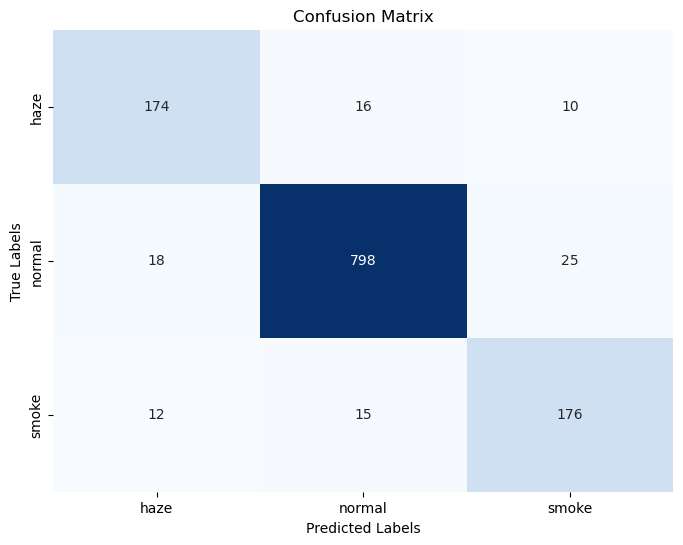

In [14]:
# Predict on the test dataset
y_pred_prob = model.predict(test_data_gen)  # Predictions as probabilities
y_pred = np.argmax(y_pred_prob, axis=1)         # Convert probabilities to class indices
y_true = test_data_gen.classes                  # True labels from the test generator

# Get class labels
class_indices = test_data_gen.class_indices
class_labels = list(class_indices.keys())

# Confusion Matrix
cm = confusion_matrix(y_true, y_pred)

# Classification Report
report = classification_report(y_true, y_pred, target_names=class_labels)
accuracy = accuracy_score(y_true, y_pred)

# Print Classification Report
print("Classification Report:")
print(report)
print(f"Overall Accuracy: {accuracy * 100:.2f}%")

# Plot Confusion Matrix
plt.figure(figsize=(8, 6))
cm_df = pd.DataFrame(cm, index=class_labels, columns=class_labels)  # Create a DataFrame for better readability
sns.heatmap(cm_df, annot=True, fmt='d', cmap='Blues', cbar=False)   # Plot the heatmap
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


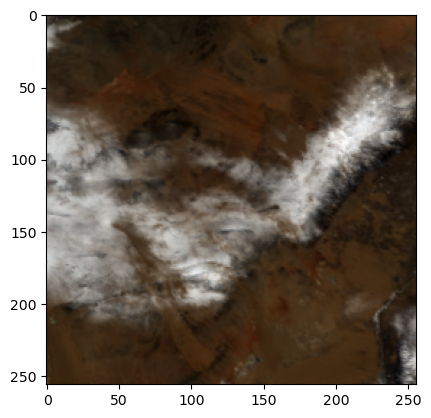

The model prediction is: clouds
haze: 0.00
clouds: 1.00
smoke: 0.00


In [10]:
import tensorflow as tf

# SavedModel or .keras/.h5
model = tf.keras.models.load_model("mobilenettest1.h5")

#bonus: test with image
img_path = r"C:\Users\Issac\Downloads\HacX\test\normal\cloud_4.tif"
img = utils.load_img(img_path, target_size=(256, 256))
img_tensor = utils.img_to_array(img)
img_tensor = np.expand_dims(img_tensor, axis=0)
img_tensor = img_tensor / 255.0


pred = model.predict(img_tensor)  # Get probabilities for each class
predicted_class_index = np.argmax(pred[0])  # Get index of the highest probability
class_names = ["haze","clouds","smoke"]
plt.imshow(img_tensor[0])
plt.show()
print(f"The model prediction is: {class_names[predicted_class_index]}")
for i, prob in enumerate(pred[0]):
    print(f"{class_names[i]}: {prob:.2f}")

In [20]:
import tensorflow as tf
tf.keras.utils.image_dataset_from_directory.defaults = (test_dir, ('.bmp', '.gif', '.jpeg', '.jpg', '.png', '.tif'))

## EFFI NET (NOT GOOD)

In [ ]:
# EfficientNetB0
from keras.applications.efficientnet import EfficientNetB0
from keras.layers import GlobalAveragePooling2D, Dense
from keras.models import Model

base_model = EfficientNetB0(weights='imagenet', include_top=False,
                            input_shape=(IMG_HEIGHT, IMG_WIDTH, 3))
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(32, activation='relu')(x)
prediction = Dense(3, activation='softmax')(x)

Trans_ModelEFN = Model(inputs=base_model.input, outputs=prediction)
Trans_ModelEFN.summary()

Model: "functional_6"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_6       │ (None, 256, 256,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ rescaling_2         │ (None, 256, 256,  │          0 │ input_layer_6[0]… │
│ (Rescaling)         │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ normalization_1     │ (None, 256, 256,  │          7 │ rescaling_2[0][0] │
│ (Normalization)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ rescaling_3         │ (None, 256, 256,  │          0 │ normalization_1[… │
│ (Rescaling)         │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_conv_pad       │ (None, 257, 257,  │          0 │ rescaling_3[0][0] │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_conv (Conv2D)  │ (None, 128, 128,  │        864 │ stem_conv_pad[0]… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_bn             │ (None, 128, 128,  │        128 │ stem_conv[0][0]   │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_activation     │ (None, 128, 128,  │          0 │ stem_bn[0][0]     │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_dwconv      │ (None, 128, 128,  │        288 │ stem_activation[… │
│ (DepthwiseConv2D)   │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_bn          │ (None, 128, 128,  │        128 │ block1a_dwconv[0… │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_activation  │ (None, 128, 128,  │          0 │ block1a_bn[0][0]  │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_squeeze  │ (None, 32)        │          0 │ block1a_activati… │
│ (GlobalAveragePool… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_reshape  │ (None, 1, 1, 32)  │          0 │ block1a_se_squee… │
│ (Reshape)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_reduce   │ (None, 1, 1, 8)   │        264 │ block1a_se_resha… │
│ (Conv2D)            │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_expand   │ (None, 1, 1, 32)  │        288 │ block1a_se_reduc… │
│ (Conv2D)            │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_excite   │ (None, 128, 128,  │          0 │ block1a_activati… │
│ (Multiply)          │ 32)               │            │ block1a_se_expan… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_project_co… │ (None, 128, 128,  │        512 │ block1a_se_excit

 Total params: 4,090,662 (15.60 MB)

 Trainable params: 4,048,639 (15.44 MB)

 Non-trainable params: 42,023 (164.16 KB)

In [ ]:
#freeze base model layers
base_model.trainable = False

# Let's confirm all the layers of convolutional base are frozen.
for layer in base_model.layers:
    print(layer.name, layer.trainable)

input_layer_6 False
rescaling_2 False
normalization_1 False
rescaling_3 False
stem_conv_pad False
stem_conv False
stem_bn False
stem_activation False
block1a_dwconv False
block1a_bn False
block1a_activation False
block1a_se_squeeze False
block1a_se_reshape False
block1a_se_reduce False
block1a_se_expand False
block1a_se_excite False
block1a_project_conv False
block1a_project_bn False
block2a_expand_conv False
block2a_expand_bn False
block2a_expand_activation False
block2a_dwconv_pad False
block2a_dwconv False
block2a_bn False
block2a_activation False
block2a_se_squeeze False
block2a_se_reshape False
block2a_se_reduce False
block2a_se_expand False
block2a_se_excite False
block2a_project_conv False
block2a_project_bn False
block2b_expand_conv False
block2b_expand_bn False
block2b_expand_activation False
block2b_dwconv False
block2b_bn False
block2b_activation False
block2b_se_squeeze False
block2b_se_reshape False
block2b_se_reduce False
block2b_se_expand False
block2b_se_excite False
bl

In [ ]:
path_checkpoint= r"C:\Users\Marcus\Documents\NYP\NYPY3\Y3S2\Hackathon\Project Data\model_checkpoint.weights.h5"
es_callback = keras.callbacks.EarlyStopping(monitor="accuracy",patience=4)
modelckpt_callback=keras.callbacks.ModelCheckpoint(
    monitor="accuracy",
    filepath=path_checkpoint,
    verbose=1,
    save_weights_only=True,
    save_best_only=True)
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
Trans_ModelEFN.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
history = Trans_ModelEFN.fit(train_data_gen,epochs=epochs,validation_data=test_data_gen, callbacks=[es_callback, modelckpt_callback])

Epoch 1/25
117/117 ━━━━━━━━━━━━━━━━━━━━ 0s 486ms/step - accuracy: 0.6525 - loss: 0.8820
Epoch 1: accuracy improved from -inf to 0.67086, saving model to C:\Users\Marcus\Documents\NYP\NYPY3\Y3S2\Hackathon\Project Data\model_checkpoint.weights.h5
117/117 ━━━━━━━━━━━━━━━━━━━━ 77s 623ms/step - accuracy: 0.6527 - loss: 0.8819 - val_accuracy: 0.6760 - val_loss: 0.8611
Epoch 2/25
117/117 ━━━━━━━━━━━━━━━━━━━━ 0s 485ms/step - accuracy: 0.6811 - loss: 0.8537
Epoch 2: accuracy improved from 0.67086 to 0.67595, saving model to C:\Users\Marcus\Documents\NYP\NYPY3\Y3S2\Hackathon\Project Data\model_checkpoint.weights.h5
117/117 ━━━━━━━━━━━━━━━━━━━━ 72s 613ms/step - accuracy: 0.6810 - loss: 0.8538 - val_accuracy: 0.6760 - val_loss: 0.8580
Epoch 3/25
117/117 ━━━━━━━━━━━━━━━━━━━━ 0s 483ms/step - accuracy: 0.6880 - loss: 0.8472
Epoch 3: accuracy did not improve from 0.67595
117/117 ━━━━━━━━━━━━━━━━━━━━ 71s 607ms/step - accuracy: 0.6879 - loss: 0.8473 - val_accuracy: 0.6760 - val_loss: 0.8698
Epoch 4/25
1

In [ ]:
# ResNet50
from keras.applications.resnet50 import ResNet50
from keras.layers import GlobalAveragePooling2D, Dense
from keras.models import Model

base_model = ResNet50(weights='imagenet', include_top=False,
                      input_shape=(IMG_HEIGHT, IMG_WIDTH, 3))
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(32, activation='relu')(x)
prediction = Dense(3, activation='softmax')(x)

Trans_ModelRSN = Model(inputs=base_model.input, outputs=prediction)
Trans_ModelRSN.summary()

Model: "functional_8"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_8       │ (None, 256, 256,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_pad           │ (None, 262, 262,  │          0 │ input_layer_8[0]… │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_conv (Conv2D) │ (None, 128, 128,  │      9,472 │ conv1_pad[0][0]   │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_bn            │ (None, 128, 128,  │        256 │ conv1_conv[0][0]  │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_relu          │ (None, 128, 128,  │          0 │ conv1_bn[0][0]    │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pad           │ (None, 130, 130,  │          0 │ conv1_relu[0][0]  │
│ (ZeroPadding2D)     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pool          │ (None, 64, 64,    │          0 │ pool1_pad[0][0]   │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_conv │ (None, 64, 64,    │      4,160 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_bn   │ (None, 64, 64,    │        256 │ conv2_block1_1_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_relu │ (None, 64, 64,    │          0 │ conv2_block1_1_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_conv │ (None, 64, 64,    │     36,928 │ conv2_block1_1_r… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_bn   │ (None, 64, 64,    │        256 │ conv2_block1_2_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_relu │ (None, 64, 64,    │          0 │ conv2_block1_2_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_conv │ (None, 64, 64,    │     16,640 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_conv │ (None, 64, 64,    │     16,640 │ conv2_block1_2_r… │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_bn   │ (None, 64, 64,    │      1,024 │ conv2_block1_0_c… │
│ (BatchNormalizatio… │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_bn   │ (None, 64, 64,    │      1,024 │ conv2_block1_3_c

 Total params: 23,653,379 (90.23 MB)

 Trainable params: 23,600,259 (90.03 MB)

 Non-trainable params: 53,120 (207.50 KB)

In [ ]:
#freeze base model layers
base_model.trainable = False

# Let's confirm all the layers of convolutional base are frozen.
for layer in base_model.layers:
    print(layer.name, layer.trainable)

input_layer_8 False
conv1_pad False
conv1_conv False
conv1_bn False
conv1_relu False
pool1_pad False
pool1_pool False
conv2_block1_1_conv False
conv2_block1_1_bn False
conv2_block1_1_relu False
conv2_block1_2_conv False
conv2_block1_2_bn False
conv2_block1_2_relu False
conv2_block1_0_conv False
conv2_block1_3_conv False
conv2_block1_0_bn False
conv2_block1_3_bn False
conv2_block1_add False
conv2_block1_out False
conv2_block2_1_conv False
conv2_block2_1_bn False
conv2_block2_1_relu False
conv2_block2_2_conv False
conv2_block2_2_bn False
conv2_block2_2_relu False
conv2_block2_3_conv False
conv2_block2_3_bn False
conv2_block2_add False
conv2_block2_out False
conv2_block3_1_conv False
conv2_block3_1_bn False
conv2_block3_1_relu False
conv2_block3_2_conv False
conv2_block3_2_bn False
conv2_block3_2_relu False
conv2_block3_3_conv False
conv2_block3_3_bn False
conv2_block3_add False
conv2_block3_out False
conv3_block1_1_conv False
conv3_block1_1_bn False
conv3_block1_1_relu False
conv3_block1

In [ ]:
path_checkpoint= r"C:\Users\Marcus\Documents\NYP\NYPY3\Y3S2\Hackathon\Project Data\model_checkpoint.weights.h5"
es_callback = keras.callbacks.EarlyStopping(monitor="accuracy",patience=4)
modelckpt_callback=keras.callbacks.ModelCheckpoint(
    monitor="accuracy",
    filepath=path_checkpoint,
    verbose=1,
    save_weights_only=True,
    save_best_only=True)
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
Trans_ModelRSN.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
history = Trans_ModelRSN.fit(train_data_gen,epochs=epochs,validation_data=test_data_gen, callbacks=[es_callback, modelckpt_callback])

Epoch 1/25
117/117 ━━━━━━━━━━━━━━━━━━━━ 0s 914ms/step - accuracy: 0.6561 - loss: 0.8885
Epoch 1: accuracy improved from -inf to 0.67595, saving model to C:\Users\Marcus\Documents\NYP\NYPY3\Y3S2\Hackathon\Project Data\model_checkpoint.weights.h5
117/117 ━━━━━━━━━━━━━━━━━━━━ 145s 1s/step - accuracy: 0.6562 - loss: 0.8882 - val_accuracy: 0.6760 - val_loss: 0.9362
Epoch 2/25
117/117 ━━━━━━━━━━━━━━━━━━━━ 0s 887ms/step - accuracy: 0.6822 - loss: 0.8298
Epoch 2: accuracy did not improve from 0.67595
117/117 ━━━━━━━━━━━━━━━━━━━━ 138s 1s/step - accuracy: 0.6821 - loss: 0.8299 - val_accuracy: 0.6760 - val_loss: 0.8426
Epoch 3/25
117/117 ━━━━━━━━━━━━━━━━━━━━ 0s 888ms/step - accuracy: 0.6874 - loss: 0.8219
Epoch 3: accuracy did not improve from 0.67595
117/117 ━━━━━━━━━━━━━━━━━━━━ 138s 1s/step - accuracy: 0.6873 - loss: 0.8219 - val_accuracy: 0.6760 - val_loss: 0.8265
Epoch 4/25
117/117 ━━━━━━━━━━━━━━━━━━━━ 0s 890ms/step - accuracy: 0.6796 - loss: 0.8323
Epoch 4: accuracy did not improve from 0.67